In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as  plt
import yfinance as yf
from pandas import Series,DataFrame
from numpy.random import randn
from scipy import stats
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import requests
from io import StringIO

In [4]:
poll_df= pd.read_csv('2012-general-election-romney-vs-obama.csv')

In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,NaN,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,NaN,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,NaN,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,NaN,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,NaN,NaN,1


In [6]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             106 non-null    ob

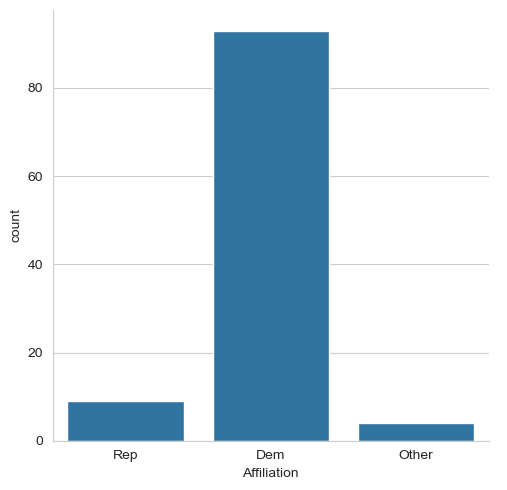

In [8]:
sns.catplot(poll_df,x='Affiliation',kind='count')

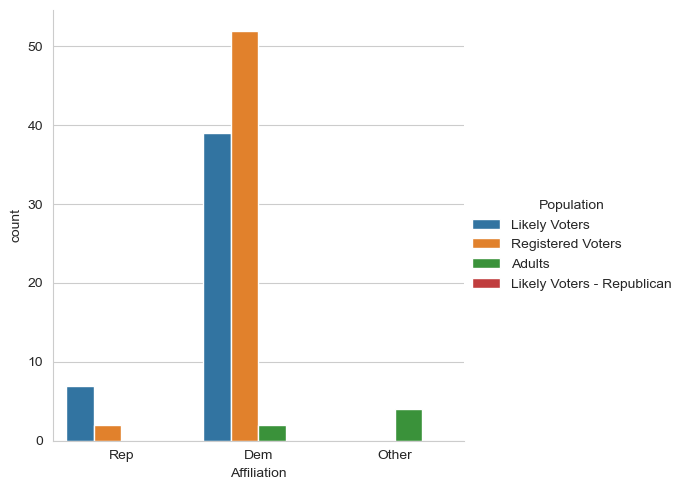

In [9]:
sns.catplot(poll_df,x='Affiliation',kind='count',hue='Population')

In [24]:
avg = poll_df[['Obama','Romney','Undecided']].mean()

In [25]:
std = poll_df[['Obama','Romney','Undecided']].std()

<Axes: >

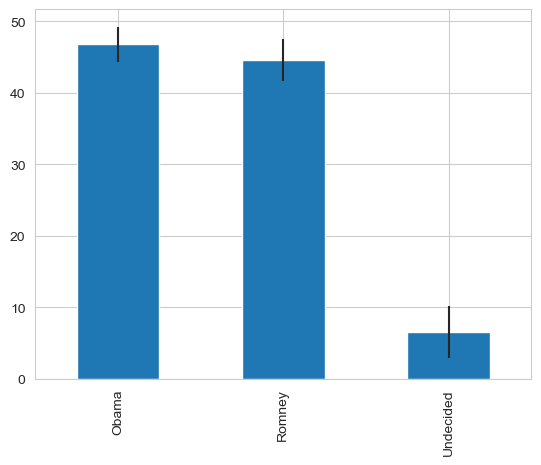

In [27]:
avg.plot(yerr=std,kind='bar',legend=False)

In [31]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns=['AVG','STD']

In [32]:
poll_avg.head()

,AVG,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614


<Axes: xlabel='End Date'>

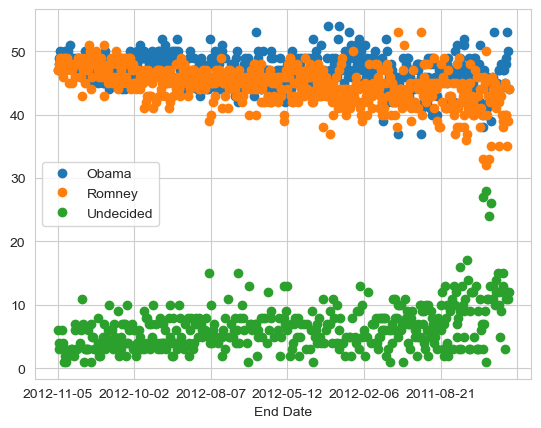

In [33]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [43]:
poll_df['Diff']=(poll_df['Obama']-poll_df['Romney'])/100

In [45]:
poll_df = poll_df.groupby(['Start Date'],as_index=False)
#poll_df.plot(x='End Date',y=['Diff','Undecided'],linestyle='',marker='o')

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [49]:
poll_df=poll_df.mean(numeric_only=True)

In [52]:
poll_df.drop(['Other','Question Text','Question Iteration'],inplace=True,axis=1)

In [53]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Diff
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


<Axes: xlabel='Start Date'>

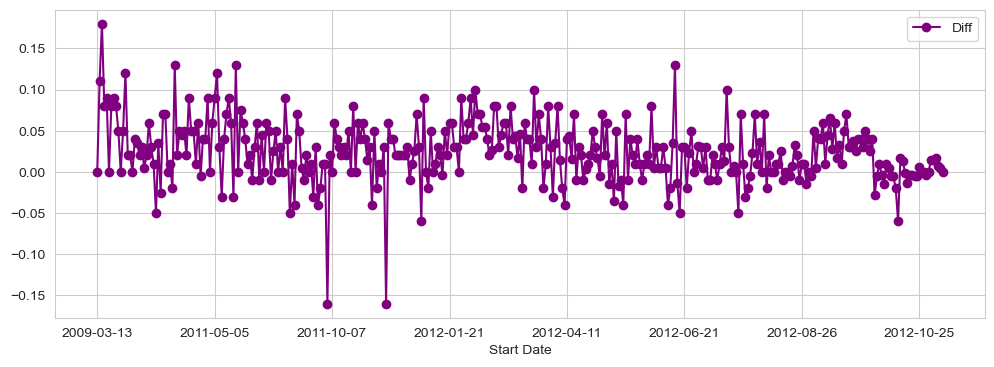

In [54]:
poll_df.plot(x='Start Date',y='Diff',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [55]:
row_in=0
xlimit=[]
for date in poll_df['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
print(min(xlimit))
print(max(xlimit))

329
356


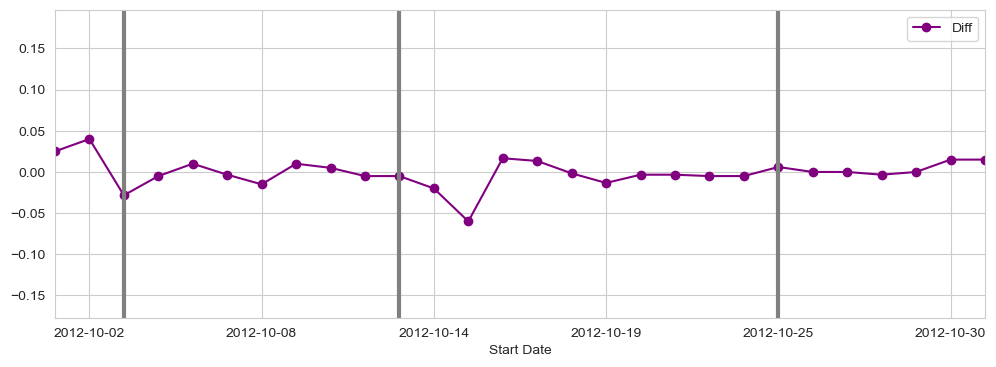

In [57]:
poll_df.plot(x='Start Date',y='Diff',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))
plt.axvline(x=329+2,linewidth=3,color='grey') #3rd Oct
plt.axvline(x=329+10,linewidth=3,color='grey') #11th Oct
plt.axvline(x=329+21,linewidth=3,color='grey') #22nd Oct

In [5]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\cheta\AppData\Local\Temp\ipykernel_3084\981006520.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  donor_df = pd.read_csv('Election_Donor_Data.csv')


In [6]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [7]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [8]:
donor_df['contb_receipt_amt'].value_counts()

contb_receipt_amt
 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: count, Length: 8079, dtype: int64

In [10]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

In [13]:
print('The average donation was %.2f and with standard deviation %.2f'%(don_mean,don_std))

The average donation was 298.24 and with standard deviation 3749.67


In [19]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [23]:
top_donor=top_donor[top_donor>0]

In [24]:
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [25]:
top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [26]:
top_donor.value_counts()

contb_receipt_amt
100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
            ...  
270.92          1
143.99          1
50.47           1
89.66           1
2408.79         1
Name: count, Length: 7326, dtype: int64

<Axes: >

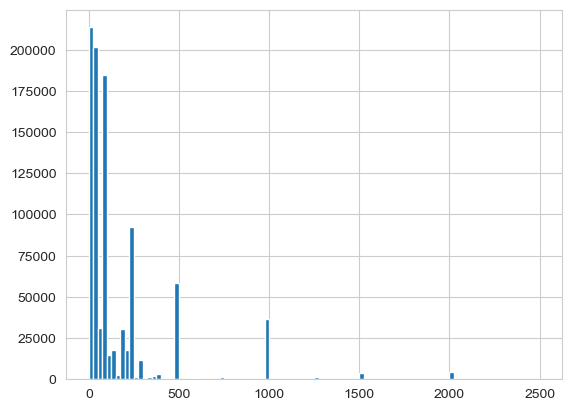

In [30]:
com_don=top_donor[top_donor<2500]
com_don.hist(bins=100)

In [32]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [39]:
donor_df['Party']=np.nan
for i in range(0,len(donor_df)):
    if donor_df['cand_nm'][i]=='Obama, Barack':
        donor_df.Party[i]='Democrat'
    else:
        donor_df.Party[i]='Republican'

C:\Users\cheta\AppData\Local\Temp\ipykernel_3084\3313285954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor_df.Party[i]='Republican'
C:\Users\cheta\AppData\Local\Temp\ipykernel_3084\3313285954.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Republican' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  donor_df.Party[i]='Republican'


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [42]:
donor_df=donor_df[donor_df.contb_receipt_amt>0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [43]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [44]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [62]:
cand_don=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
for i,j in cand_don.items():
    print('The candidate %s raised %.0f dollars'%(i,j))
    print('\n')
    

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




<Axes: xlabel='cand_nm'>

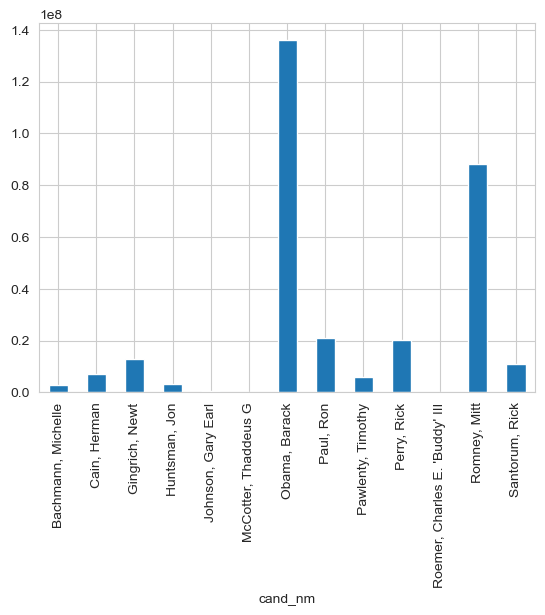

In [63]:
cand_don.plot(kind='bar')

<Axes: xlabel='Party'>

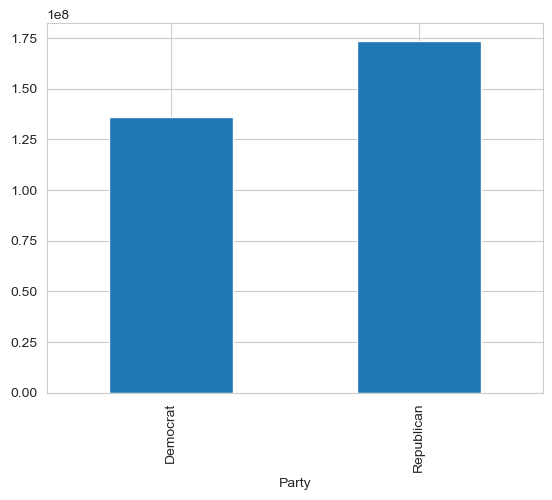

In [65]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [72]:
occupation_df=donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [73]:
occupation_df=occupation_df[occupation_df.sum(1)>1000000]
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41


<Axes: xlabel='contbr_occupation'>

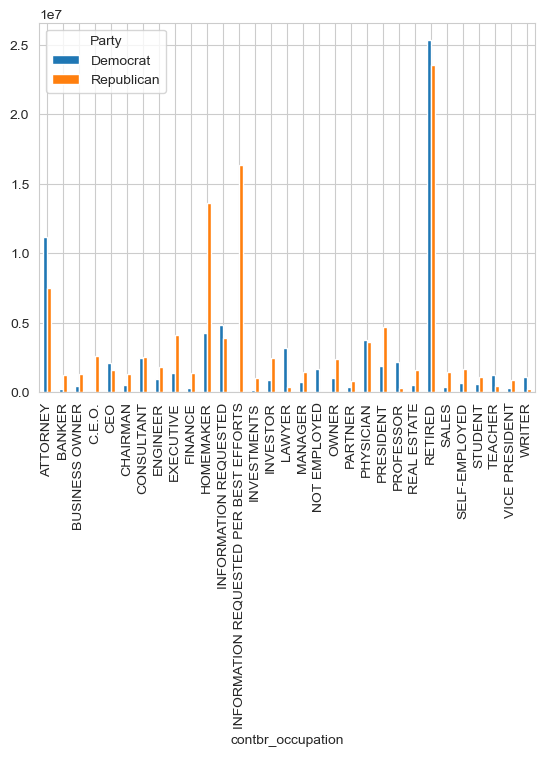

In [74]:
occupation_df.plot(kind='bar')

<Axes: ylabel='contbr_occupation'>

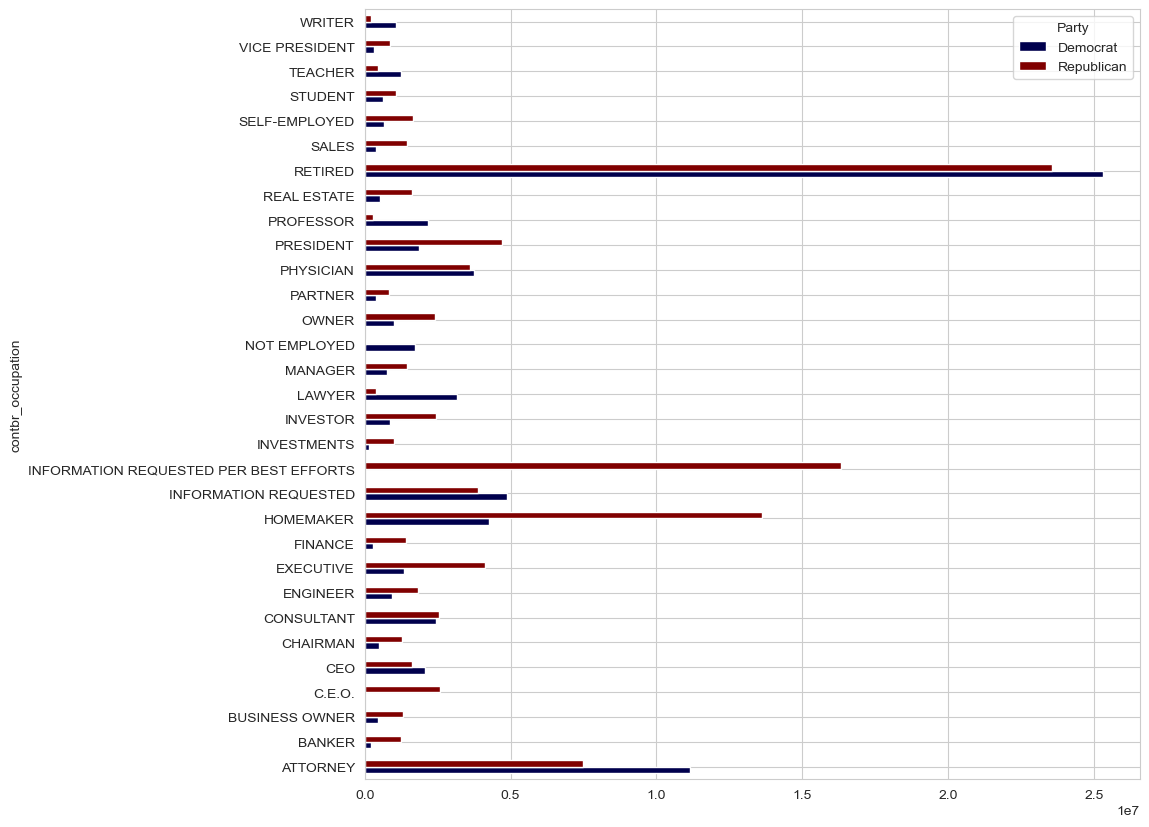

In [76]:
occupation_df.plot(kind='barh',figsize=(10,10),cmap='seismic')

In [77]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],inplace=True)

In [78]:
occupation_df.loc['CEO']=occupation_df.loc['CEO']+occupation_df.loc['C.E.O.']

<Axes: ylabel='contbr_occupation'>

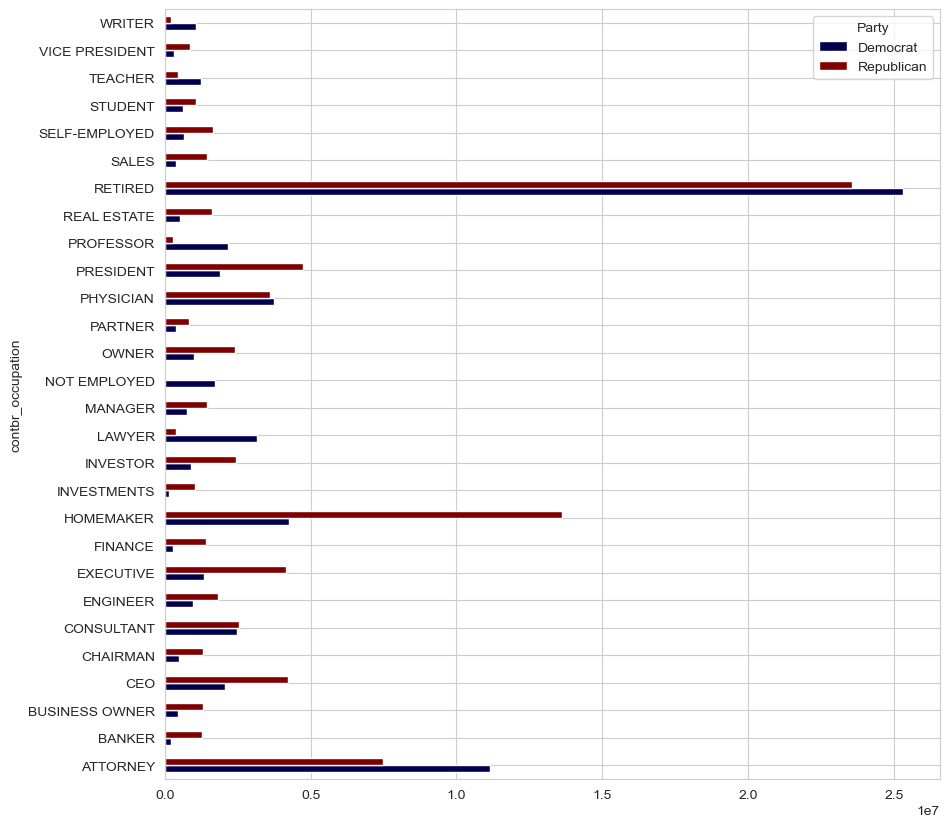

In [80]:
occupation_df.drop(['C.E.O.'],inplace=True)
occupation_df.plot(kind='barh',figsize=(10,10),cmap='seismic')